<a href="https://colab.research.google.com/github/opanasyuzhenkova/university-portfolio/blob/main/6sem_lr6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Лабораторная работа 6

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings


In [ ]:
data = pd.read_csv('web-traffic.csv', delimiter=';')

print(data['date'])

data['date'] = pd.to_datetime(data['date'], format='%Y.%m.%d')
daily_data = data.groupby('date').sum().reset_index()


0       2019-10-02
1       2019-10-02
2       2019-10-02
3       2019-10-02
4       2019-10-02
           ...    
6493    2020-09-30
6494    2020-09-30
6495    2020-09-30
6496    2020-09-30
6497    2020-09-30
Name: date, Length: 6498, dtype: object


<ipython-input-5-3ccf7a592729>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = data.groupby('date').sum().reset_index()


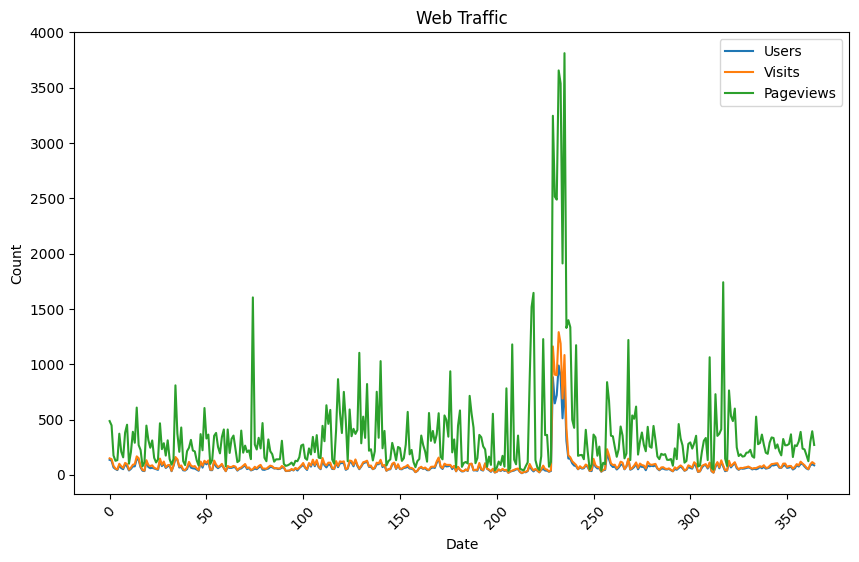

In [ ]:
# График суммы пользователей (users), посещений (visits) и просмотров страниц (pageviews)
plt.figure(figsize=(10, 6))
plt.plot(daily_data.index, daily_data['users'], label='Users')
plt.plot(daily_data.index, daily_data['visits'], label='Visits')
plt.plot(daily_data.index, daily_data['pageviews'], label='Pageviews')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Web Traffic')
plt.legend()
plt.xticks(rotation=45)
plt.show()



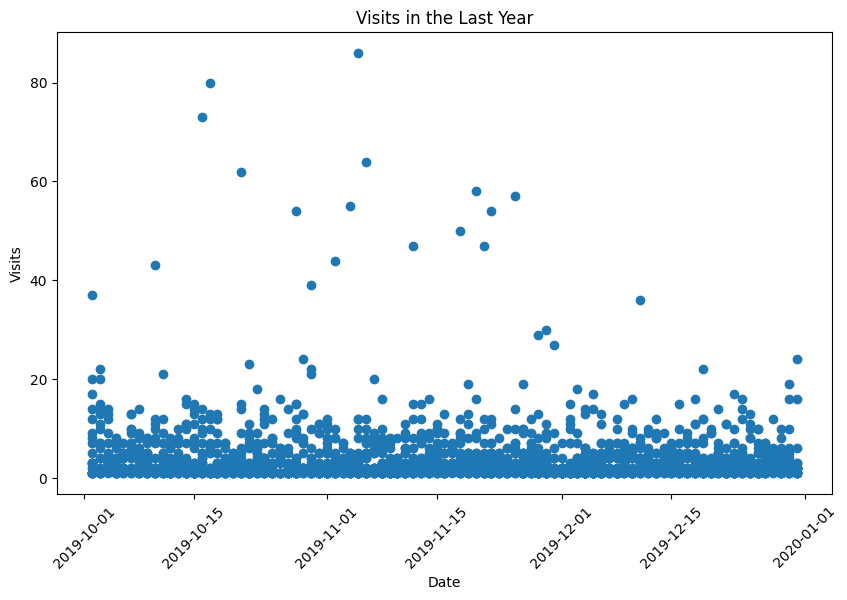

In [ ]:
# Диаграмма рассеяния

last_year_data = data[data['date'].dt.year == (data['date'].dt.year.max() - 1)]

plt.figure(figsize=(10, 6))
plt.scatter(last_year_data['date'], last_year_data['visits'])
plt.xlabel('Date')
plt.ylabel('Visits')
plt.title('Visits in the Last Year')
plt.xticks(rotation=45)
plt.show()


<ipython-input-8-709e68adc4a0>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = monthly_data.groupby(monthly_data['date'].dt.strftime('%Y-%m')).sum()


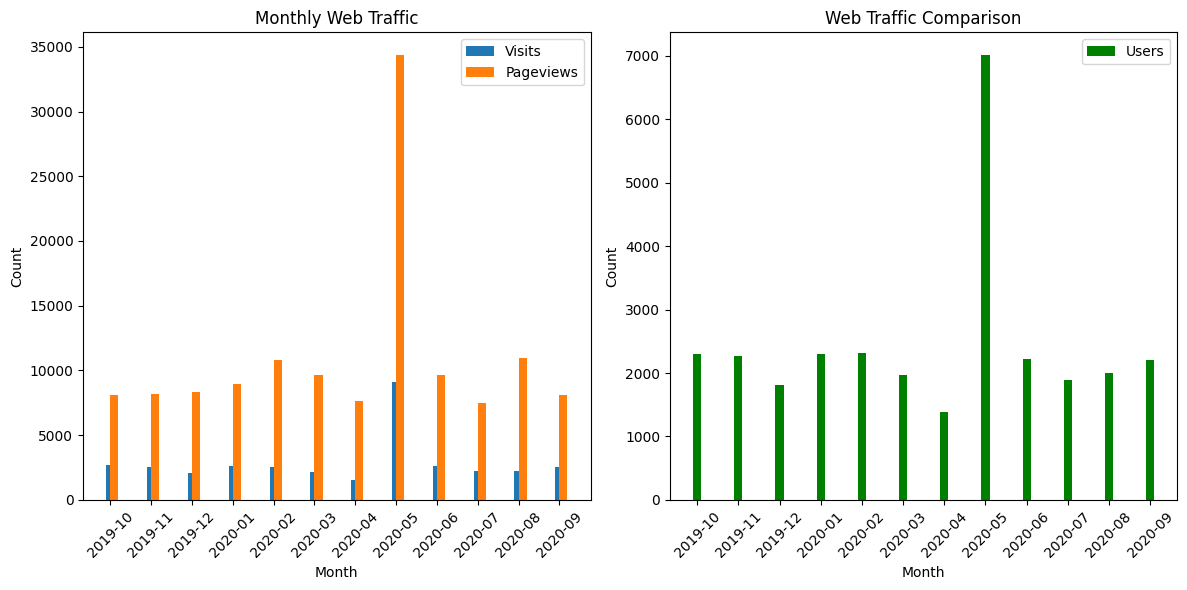

In [ ]:
# Суммарные значения по месяцам за год (2.10.2019-30.09.2020)

import pandas as pd
import matplotlib.pyplot as plt

monthly_data = data[(data['date'] >= '2019-10-02') & (data['date'] <= '2020-09-30')]
monthly_data = monthly_data.groupby(monthly_data['date'].dt.strftime('%Y-%m')).sum()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
bar_width = 0.2

ax1.bar(monthly_data.index, monthly_data['visits'], width=bar_width, label='Visits', align='center')
ax1.bar(monthly_data.index, monthly_data['pageviews'], width=bar_width, label='Pageviews', align='edge')\

ax1.set_xlabel('Month')
ax1.set_ylabel('Count')
ax1.set_title('Monthly Web Traffic')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

ax2.bar(monthly_data.index, monthly_data['users'], width=bar_width, label='Users', color='green')
ax2.set_xlabel('Month')
ax2.set_ylabel('Count')
ax2.set_title('Web Traffic Comparison')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

data = data.groupby('date').sum().reset_index()

X = data[['date']]
y = data[['users', 'visits']]

# X['date'] = pd.to_datetime(X['date']).dt.strftime('%Y%m%d').astype(int)
X.loc[:, 'date'] = pd.to_datetime(X['date']).dt.strftime('%Y%m%d').astype(int)

# Нормализация
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Модель
regressor = LinearRegression()
regressor.fit(X_scaled, y)

input_date = input("Введите дату (в формате гггг-мм-дд): ")
input_date = pd.to_datetime(input_date).strftime('%Y%m%d')
input_date_scaled = scaler.transform([[int(input_date)]])

prediction = regressor.predict(input_date_scaled)

print(f'Users: {prediction[0][0]:.5}')
print(f'Visits:" {prediction[0][1]:.5}')


<ipython-input-10-2b74e7ab1d1c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'date'] = pd.to_datetime(X['date']).dt.strftime('%Y%m%d').astype(int)
